# Fraud Detection with Machine Learning
# ======================================

# 📌 Introduction
Every day, financial institutions face the challenge of detecting fraudulent transactions hidden among millions of legitimate ones.
In this case study, we'll use machine learning to identify such frauds using real-world anonymized credit card data.

Our goal is to build a classification model that can accurately detect fraud while minimizing false alarms.

In [3]:
# 📦 Step 1: Import Required Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Configure visual style
sns.set(style="whitegrid")
plt.rcParams["figure.figsize"] = (12, 6)

# ⚙️ Step 2: Load the Dataset
# Note: Ensure 'creditcard.csv' is in the same folder as this notebook.
df = pd.read_csv("creditcard.csv")

# 🧐 Step 3: Basic Exploration
print("✅ Dataset Loaded Successfully!")
print(f"Shape of the dataset: {df.shape}")
print("\n🔍 First 5 rows:")
display(df.head())

print("\n📊 Data Types:")
print(df.dtypes)

print("\n❓ Missing Values:")
print(df.isnull().sum())

print("\n📈 Summary Statistics:")
print(df.describe())


✅ Dataset Loaded Successfully!
Shape of the dataset: (284807, 31)

🔍 First 5 rows:


,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0



📊 Data Types:
Time      float64
V1        float64
V2        float64
V3        float64
V4        float64
V5        float64
V6        float64
V7        float64
V8        float64
V9        float64
V10       float64
V11       float64
V12       float64
V13       float64
V14       float64
V15       float64
V16       float64
V17       float64
V18       float64
V19       float64
V20       float64
V21       float64
V22       float64
V23       float64
V24       float64
V25       float64
V26       float64
V27       float64
V28       float64
Amount    float64
Class       int64
dtype: object

❓ Missing Values:
Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

📈 Summar

# Exploratory Data Analysis (EDA)


🚨 Class Distribution:
Class
0    284315
1       492
Name: count, dtype: int64

Fraud cases: 492 (0.1727%)


C:\Users\Axioo Pongo\AppData\Local\Temp\ipykernel_22116\3877768196.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='Class', palette=['skyblue', 'salmon'])


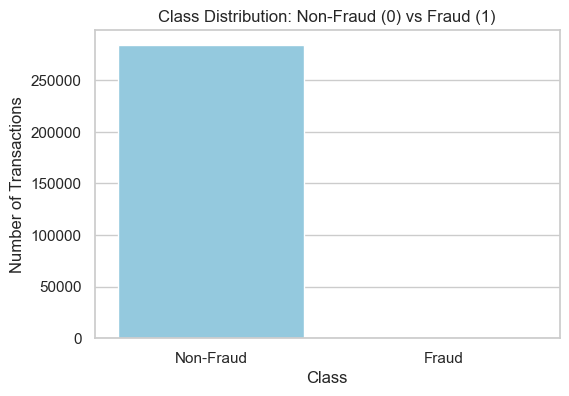

In [4]:
# Check the distribution of the target variable
fraud_counts = df['Class'].value_counts()
print("\n🚨 Class Distribution:")
print(fraud_counts)
print(f"\nFraud cases: {fraud_counts[1]} ({100 * fraud_counts[1] / fraud_counts.sum():.4f}%)")

# Plot the distribution
plt.figure(figsize=(6,4))
sns.countplot(data=df, x='Class', palette=['skyblue', 'salmon'])
plt.title("Class Distribution: Non-Fraud (0) vs Fraud (1)")
plt.xticks([0, 1], ['Non-Fraud', 'Fraud'])
plt.ylabel("Number of Transactions")
plt.xlabel("Class")
plt.show()


# Visualize Amount by Class

C:\Users\Axioo Pongo\AppData\Local\Temp\ipykernel_22116\1109380421.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Class', y='Amount', data=df, palette='Set2')


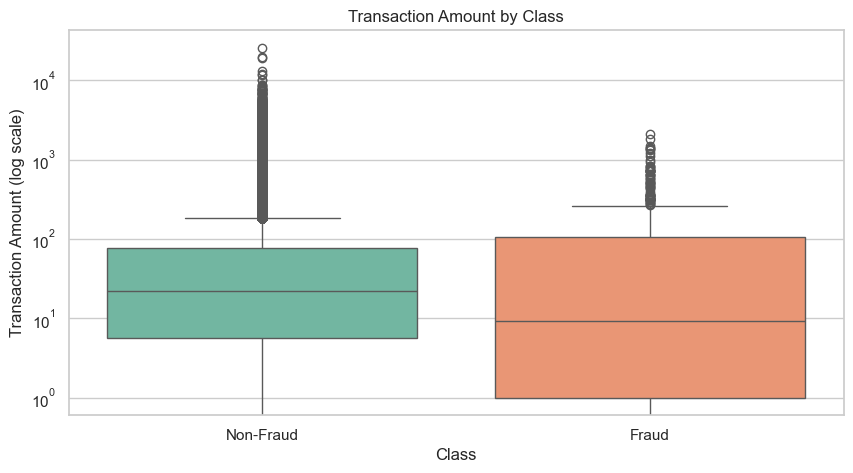

In [5]:
# Compare transaction amount for fraud vs non-fraud
plt.figure(figsize=(10,5))
sns.boxplot(x='Class', y='Amount', data=df, palette='Set2')
plt.title("Transaction Amount by Class")
plt.xticks([0, 1], ['Non-Fraud', 'Fraud'])
plt.yscale('log')  # Log scale because of skew
plt.ylabel("Transaction Amount (log scale)")
plt.show()


# Transaction Time Trends

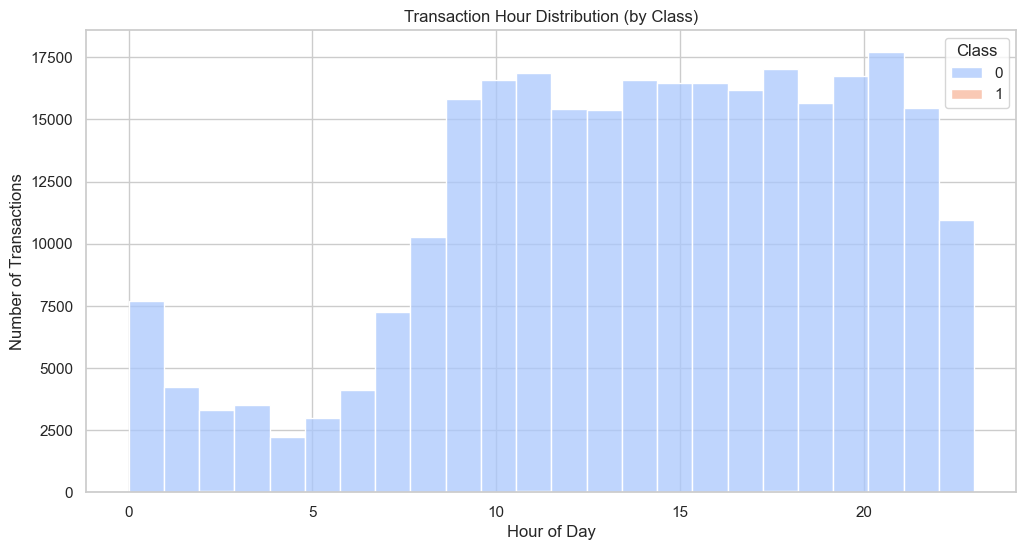

In [6]:
# Create a new column for hour of transaction
df['Hour'] = df['Time'].apply(lambda x: np.floor(x / 3600) % 24)

# Plot transaction counts by hour
plt.figure(figsize=(12, 6))
sns.histplot(data=df, x='Hour', hue='Class', multiple='stack', bins=24, palette='coolwarm')
plt.title("Transaction Hour Distribution (by Class)")
plt.xlabel("Hour of Day")
plt.ylabel("Number of Transactions")
plt.show()


# Correlation Heatmap

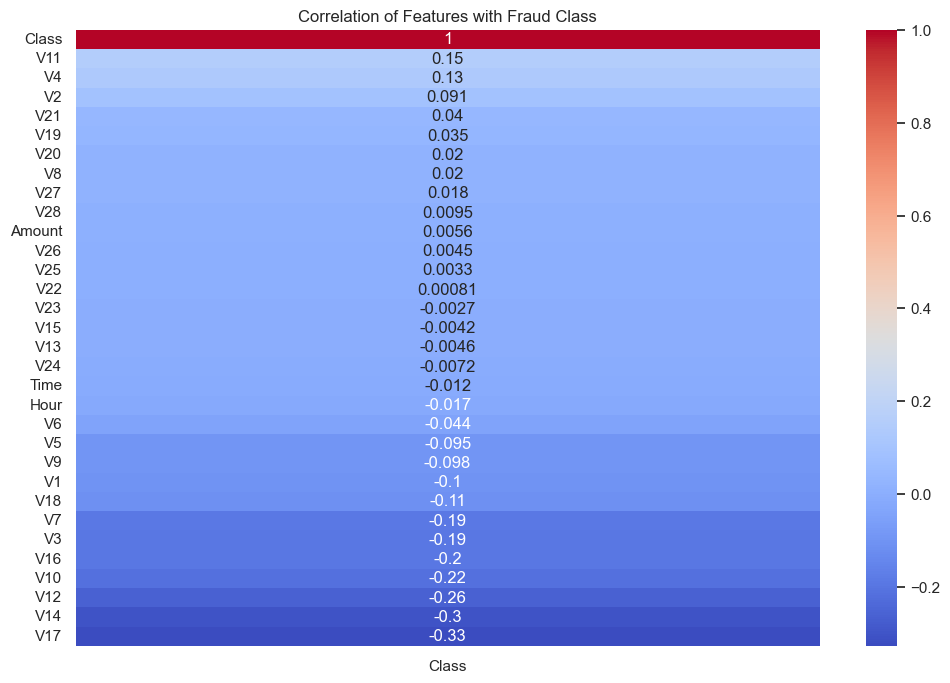

In [7]:
# Compute correlation matrix
corr = df.corr()

# Plot correlation with target class
plt.figure(figsize=(12, 8))
sns.heatmap(corr[['Class']].sort_values(by='Class', ascending=False), annot=True, cmap='coolwarm')
plt.title("Correlation of Features with Fraud Class")
plt.show()


# Data Cleaning and Preprocessing

In [15]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

# 1. Check for missing values
missing_values = df.isnull().sum()
print("Missing values in each column:\n", missing_values)

# 2. Scale 'Amount' and 'Time'
scaler = StandardScaler()
df['scaled_amount'] = scaler.fit_transform(df['Amount'].values.reshape(-1, 1))
df['scaled_time'] = scaler.fit_transform(df['Time'].values.reshape(-1, 1))

# 3. Drop original 'Amount' and 'Time'
df_clean = df.drop(['Amount', 'Time'], axis=1)

# 4. Reorder columns
cols = df_clean.columns.tolist()
cols.remove('scaled_amount')
cols.remove('scaled_time')
cols.insert(-1, 'scaled_amount')
cols.insert(-1, 'scaled_time')
df_clean = df_clean[cols]

# 5. Confirm structure
print("\nDataframe shape after cleaning:", df_clean.shape)
print(df_clean.head())

# 6. Split out 20% as unseen data
df_clean, df_unseen = train_test_split(df_clean, test_size=0.2, random_state=42, stratify=df_clean['Class'])

# Check shapes
print("\n✅ Model training data shape:", df_clean.shape)
print("🕵️ Unseen holdout data shape:", df_unseen.shape)


Missing values in each column:
 Time             0
V1               0
V2               0
V3               0
V4               0
V5               0
V6               0
V7               0
V8               0
V9               0
V10              0
V11              0
V12              0
V13              0
V14              0
V15              0
V16              0
V17              0
V18              0
V19              0
V20              0
V21              0
V22              0
V23              0
V24              0
V25              0
V26              0
V27              0
V28              0
Amount           0
Class            0
Hour             0
scaled_amount    0
scaled_time      0
dtype: int64

Dataframe shape after cleaning: (284807, 32)
         V1        V2        V3        V4        V5        V6        V7  \
0 -1.359807 -0.072781  2.536347  1.378155 -0.338321  0.462388  0.239599   
1  1.191857  0.266151  0.166480  0.448154  0.060018 -0.082361 -0.078803   
2 -1.358354 -1.340163  1.773209  0.379

# Model Benchmark (Before & After SMOTE)

In [16]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, roc_auc_score, accuracy_score
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE


import xgboost as xgb
from catboost import CatBoostClassifier
import pandas as pd
from sklearn.preprocessing import MinMaxScaler

# 1. Split data
X = df_clean.drop('Class', axis=1)
y = df_clean['Class']
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y)

# 2. Apply SMOTE to training data
smote = SMOTE(random_state=42)
X_train_smote, y_train_smote = smote.fit_resample(X_train, y_train)

# 3. Define models
models = {
    "Logistic Regression": LogisticRegression(max_iter=1000, random_state=42),
    "Random Forest": RandomForestClassifier(n_estimators=100, random_state=42),
    "XGBoost": xgb.XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42),
    "CatBoost": CatBoostClassifier(verbose=0, random_seed=42),
}

# 4. Function to benchmark models
def benchmark(models, X_train, y_train, X_test, y_test, label):
    results = {}
    print(f"===== Results {label} =====\n")
    
    for name, model in models.items():
        model.fit(X_train, y_train)
        y_pred = model.predict(X_test)

        if hasattr(model, "predict_proba"):
            y_prob = model.predict_proba(X_test)[:, 1]
        else:
            try:
                y_prob = model.decision_function(X_test)
                from sklearn.preprocessing import MinMaxScaler
                scaler = MinMaxScaler()
                y_prob = scaler.fit_transform(y_prob.reshape(-1, 1)).flatten()
            except:
                y_prob = [0] * len(y_test)

        acc = accuracy_score(y_test, y_pred)
        roc_auc = roc_auc_score(y_test, y_prob)
        results[name] = {"Accuracy": acc, "ROC-AUC": roc_auc}

        print(f"Model: {name}")
        print(f"Accuracy: {acc:.4f}")
        print(f"ROC-AUC: {roc_auc:.4f}\n")

    return pd.DataFrame(results).T.sort_values(by="Accuracy", ascending=False)

# 5. Run benchmarks
results_before = benchmark(models, X_train, y_train, X_test, y_test, "Before SMOTE")
results_after = benchmark(models, X_train_smote, y_train_smote, X_test, y_test, "After SMOTE")

# 6. Visualize results
print("===== Summary Comparison =====\n")
comparison = results_before.join(results_after, lsuffix='_Before', rsuffix='_After')
display(comparison)



===== Results Before SMOTE =====

Model: Logistic Regression
Accuracy: 0.9989
ROC-AUC: 0.9639

Model: Random Forest
Accuracy: 0.9995
ROC-AUC: 0.9412



c:\Users\Axioo Pongo\AppData\Local\Programs\Python\Python313\Lib\site-packages\xgboost\training.py:183: UserWarning: [21:58:03] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


Model: XGBoost
Accuracy: 0.9993
ROC-AUC: 0.9445

Model: CatBoost
Accuracy: 0.9995
ROC-AUC: 0.9692

===== Results After SMOTE =====

Model: Logistic Regression
Accuracy: 0.9738
ROC-AUC: 0.9750

Model: Random Forest
Accuracy: 0.9995
ROC-AUC: 0.9537



c:\Users\Axioo Pongo\AppData\Local\Programs\Python\Python313\Lib\site-packages\xgboost\training.py:183: UserWarning: [22:02:05] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


Model: XGBoost
Accuracy: 0.9994
ROC-AUC: 0.9680

Model: CatBoost
Accuracy: 0.9989
ROC-AUC: 0.9690

===== Summary Comparison =====



,Accuracy_Before,ROC-AUC_Before,Accuracy_After,ROC-AUC_After
CatBoost,0.999539,0.969240,0.998881,0.969021
Random Forest,0.999451,0.941162,0.999451,0.953729
XGBoost,0.999320,0.944465,0.999407,0.968018
Logistic Regression,0.998925,0.963872,0.973820,0.975021


# Hyperparameter Tuning with SMOTE Data (Random Forest)

In [23]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import accuracy_score, roc_auc_score

# Define parameter grid for Logistic Regression
param_dist = {
    'C': [0.001, 0.01, 0.1, 1, 10, 100],     # Inverse regularization strength
    'penalty': ['l2'],                       # Only 'l2' works with solver='lbfgs'
    'solver': ['lbfgs'],                     # Suitable for binary classification
    'max_iter': [200, 500, 1000],
}

# Create base Logistic Regression model
lr = LogisticRegression(random_state=42)

# Randomized search
random_search = RandomizedSearchCV(
    estimator=lr,
    param_distributions=param_dist,
    n_iter=10,
    scoring='roc_auc',
    cv=3,
    verbose=1,
    random_state=42,
    n_jobs=-1
)

# Fit on SMOTE-balanced data
random_search.fit(X_train_smote, y_train_smote)

# Best model
best_lr = random_search.best_estimator_
print("Best Hyperparameters:\n", random_search.best_params_)

# Evaluate on test set
y_pred = best_lr.predict(X_test)
y_prob = best_lr.predict_proba(X_test)[:, 1]

acc = accuracy_score(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_prob)

print(f"\nTest Accuracy with SMOTE: {acc:.4f}")
print(f"Test ROC-AUC with SMOTE: {roc_auc:.4f}")


Fitting 3 folds for each of 10 candidates, totalling 30 fits
Best Hyperparameters:
 {'solver': 'lbfgs', 'penalty': 'l2', 'max_iter': 500, 'C': 100}

Test Accuracy with SMOTE: 0.9737
Test ROC-AUC with SMOTE: 0.9750


# Model Comparation using oversampling data (SMOTE) and Imbalanced Data

[LightGBM] [Info] Number of positive: 315, number of negative: 181961
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0,009608 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 7674
[LightGBM] [Info] Number of data points in the train set: 182276, number of used features: 31
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0,001728 -> initscore=-6,358975
[LightGBM] [Info] Start training from score -6,358975
[LightGBM] [Info] Number of positive: 181961, number of negative: 181961
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0,017941 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 7905
[LightGBM] [Info] Number of data points in the train set: 363922, number of used features: 31
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0,500000 -> initscore=0,000000

📊 Benchmarking Results (All Metrics):
                         

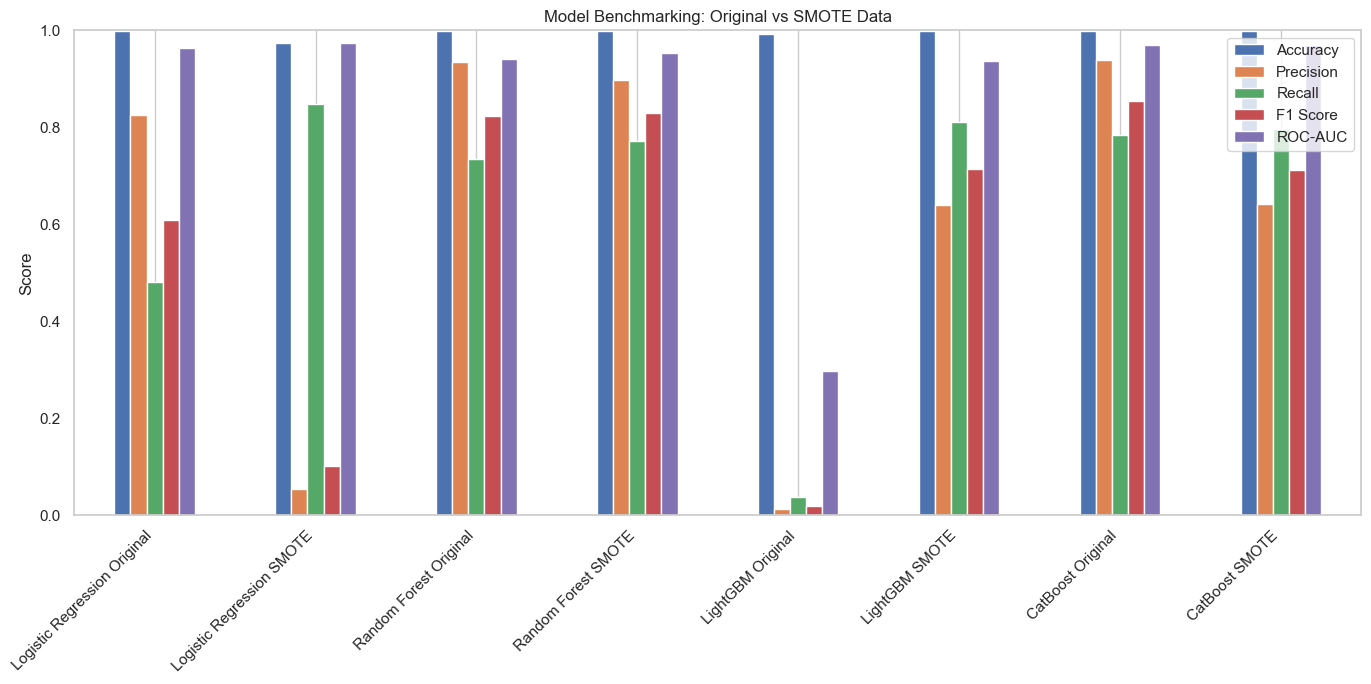

In [29]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from lightgbm import LGBMClassifier
from catboost import CatBoostClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split
import pandas as pd
import matplotlib.pyplot as plt

# Step 1: Prepare data
X = df_clean.drop('Class', axis=1)
y = df_clean['Class']

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, stratify=y, random_state=42
)

# Step 2: Prepare SMOTE data
sm = SMOTE(random_state=42)
X_train_smote, y_train_smote = sm.fit_resample(X_train, y_train)

# Step 3: Define models with (example) parameters - you can update with your best tuned params
models = {
    "Logistic Regression": LogisticRegression(max_iter=1000, random_state=42),
    "Random Forest": RandomForestClassifier(n_estimators=100, random_state=42, n_jobs=-1),
    "LightGBM": LGBMClassifier(n_estimators=100, random_state=42, n_jobs=-1),
    "CatBoost": CatBoostClassifier(verbose=0, random_seed=42)
}

# Step 4: Train and evaluate function
def evaluate_model(model, X_tr, y_tr, X_te, y_te):
    model.fit(X_tr, y_tr)
    y_pred = model.predict(X_te)
    y_prob = model.predict_proba(X_te)[:, 1]
    return {
        'Accuracy': accuracy_score(y_te, y_pred),
        'Precision': precision_score(y_te, y_pred),
        'Recall': recall_score(y_te, y_pred),
        'F1 Score': f1_score(y_te, y_pred),
        'ROC-AUC': roc_auc_score(y_te, y_prob)
    }

# Step 5: Run benchmarking on both datasets
results = {}
for name, model in models.items():
    # Train on original data
    results[f"{name} Original"] = evaluate_model(model, X_train, y_train, X_test, y_test)
    # Train on SMOTE data
    results[f"{name} SMOTE"] = evaluate_model(model, X_train_smote, y_train_smote, X_test, y_test)

# Step 6: Convert results to DataFrame for visualization
results_df = pd.DataFrame(results).T
print("\n📊 Benchmarking Results (All Metrics):")
print(results_df.round(4))

# Step 7: Plot metrics comparison
metrics = ['Accuracy', 'Precision', 'Recall', 'F1 Score', 'ROC-AUC']
results_df[metrics].plot(kind='bar', figsize=(14, 7), ylim=(0, 1))
plt.title("Model Benchmarking: Original vs SMOTE Data")
plt.ylabel("Score")
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y')
plt.tight_layout()
plt.show()


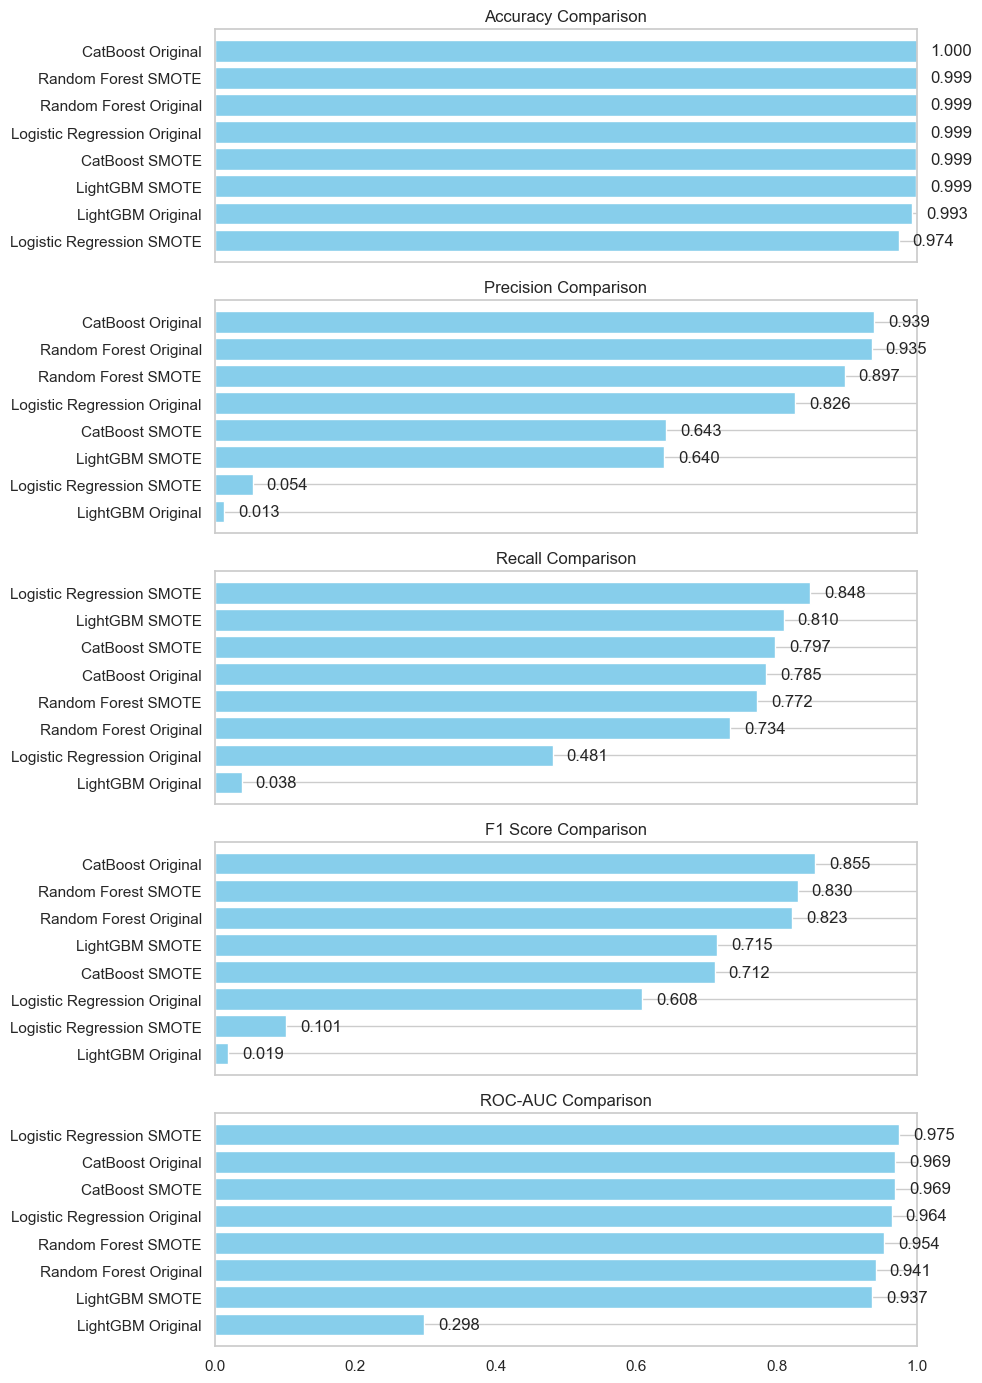

In [30]:
import matplotlib.pyplot as plt
import numpy as np

# Select metrics to plot
metrics = ['Accuracy', 'Precision', 'Recall', 'F1 Score', 'ROC-AUC']

# Setup figure with subplots (one subplot per metric)
fig, axes = plt.subplots(len(metrics), 1, figsize=(10, 14), sharex=True)

for i, metric in enumerate(metrics):
    ax = axes[i]
    # Sort results by metric for better readability
    sorted_df = results_df.sort_values(by=metric, ascending=True)
    
    bars = ax.barh(sorted_df.index, sorted_df[metric], color='skyblue')
    ax.set_title(f'{metric} Comparison')
    ax.set_xlim(0, 1)
    ax.grid(axis='x')
    
    # Annotate bar values
    for bar in bars:
        width = bar.get_width()
        ax.text(width + 0.02, bar.get_y() + bar.get_height()/2,
                f'{width:.3f}', va='center')

plt.tight_layout()
plt.show()


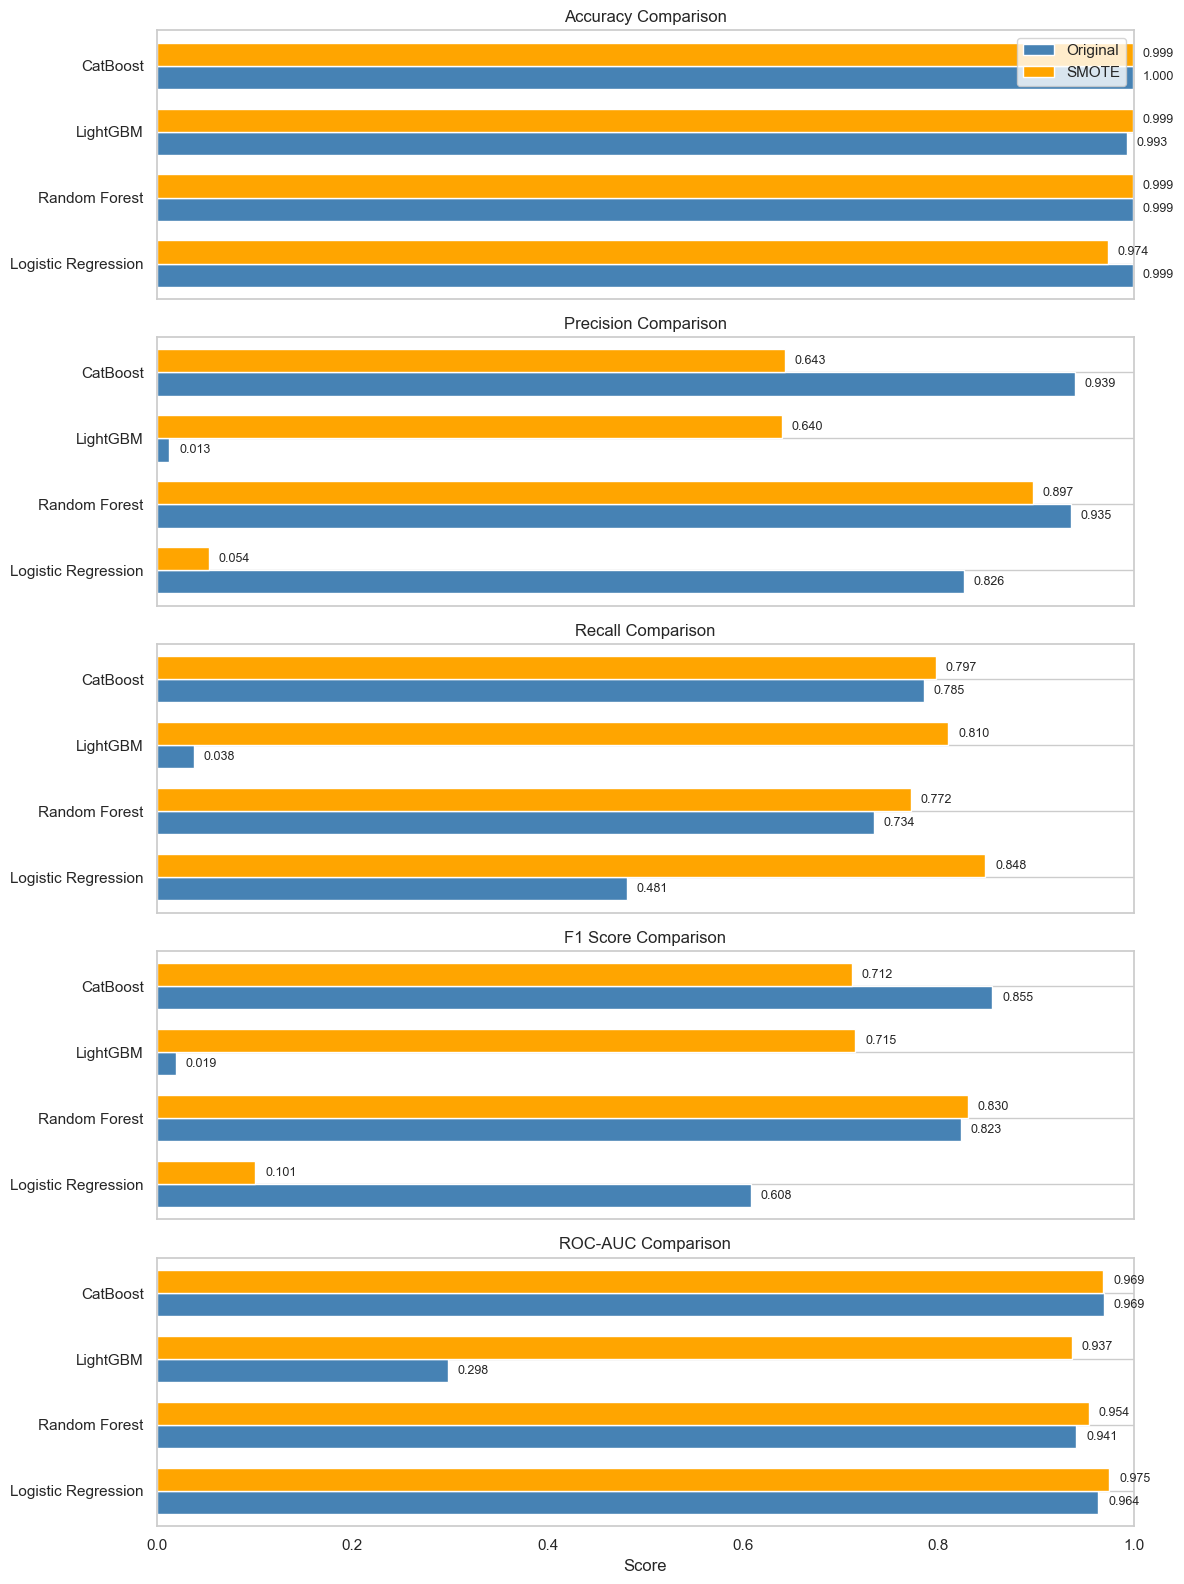

In [31]:
import matplotlib.pyplot as plt
import numpy as np

metrics = ['Accuracy', 'Precision', 'Recall', 'F1 Score', 'ROC-AUC']
models = ['Logistic Regression', 'Random Forest', 'LightGBM', 'CatBoost']
variants = ['Original', 'SMOTE']

fig, axes = plt.subplots(len(metrics), 1, figsize=(12, 16), sharex=True)

bar_height = 0.35  # height of each bar
y_pos = np.arange(len(models))  # positions for each model group

for i, metric in enumerate(metrics):
    ax = axes[i]

    # Prepare data for plotting: get metric scores per model and variant
    original_scores = [results_df.loc[f"{model} Original", metric] for model in models]
    smote_scores = [results_df.loc[f"{model} SMOTE", metric] for model in models]

    # Bars for Original and SMOTE side by side
    ax.barh(y_pos - bar_height/2, original_scores, height=bar_height, label='Original', color='steelblue')
    ax.barh(y_pos + bar_height/2, smote_scores, height=bar_height, label='SMOTE', color='orange')

    # Annotate bars
    for y, val in zip(y_pos - bar_height/2, original_scores):
        ax.text(val + 0.01, y, f'{val:.3f}', va='center', fontsize=9)
    for y, val in zip(y_pos + bar_height/2, smote_scores):
        ax.text(val + 0.01, y, f'{val:.3f}', va='center', fontsize=9)

    ax.set_yticks(y_pos)
    ax.set_yticklabels(models)
    ax.set_xlim(0, 1)
    ax.set_title(f'{metric} Comparison')
    ax.grid(axis='x')
    if i == 0:
        ax.legend()

plt.xlabel('Score')
plt.tight_layout()
plt.show()


# Without SMOTE data

In [25]:
# Fit on SMOTE-balanced data
random_search.fit(X, y)

# Evaluate on test set
y_pred_w = best_lr.predict(X_test)
y_prob_w = best_lr.predict_proba(X_test)[:, 1]

acc_w = accuracy_score(y_test, y_pred_w)
roc_auc_w = roc_auc_score(y_test, y_prob_w)

print(f"\nTest Accuracy without SMOTE: {acc:.4f}")
print(f"Test ROC-AUC without SMOTE: {roc_auc:.4f}")

Fitting 3 folds for each of 10 candidates, totalling 30 fits

Test Accuracy without SMOTE: 0.9737
Test ROC-AUC without SMOTE: 0.9750


In [18]:
# Predict class labels
y_pred = best_lr.predict(X_test)

# Predict probabilities (for ROC-AUC and threshold tuning)
y_prob = best_lr.predict_proba(X_test)[:, 1]

# Evaluate performance
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, accuracy_score

acc = accuracy_score(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_prob)

print("📊 Classification Report:\n")
print(classification_report(y_test, y_pred, digits=4))

print("\n🧾 Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))

print(f"\n✅ Accuracy: {acc:.4f}")
print(f"🎯 ROC-AUC: {roc_auc:.4f}")


📊 Classification Report:

              precision    recall  f1-score   support

           0     0.9997    0.9739    0.9867     45490
           1     0.0535    0.8481    0.1006        79

    accuracy                         0.9737     45569
   macro avg     0.5266    0.9110    0.5436     45569
weighted avg     0.9981    0.9737    0.9851     45569


🧾 Confusion Matrix:
[[44304  1186]
 [   12    67]]

✅ Accuracy: 0.9737
🎯 ROC-AUC: 0.9750


In [19]:
df_unseen

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V23,V24,V25,V26,V27,V28,Class,scaled_amount,scaled_time,Hour
263020,-0.674466,1.408105,-1.110622,-1.328366,1.388996,-1.308439,1.885879,-0.614233,0.311652,0.650757,...,-0.224327,0.707899,-0.135837,0.045102,0.533837,0.291319,0,-0.261273,1.388689,20.0
11378,-2.829816,-2.765149,2.537793,-1.074580,2.842559,-2.153536,-1.795519,-0.250020,3.073504,-1.000418,...,-0.813272,0.042996,-0.027660,-0.910247,0.110802,-0.511938,0,-0.305852,-1.578646,5.0
147283,-3.576495,2.318422,1.306985,3.263665,1.127818,2.865246,1.444125,-0.718922,1.874046,7.398491,...,-0.132058,-1.483996,-0.296011,0.062823,0.552411,0.509764,0,-0.049095,-0.136621,0.0
219439,2.060386,-0.015382,-1.082544,0.386019,-0.024331,-1.074935,0.207792,-0.338140,0.455091,0.047859,...,0.331818,-0.067584,-0.283675,0.203529,-0.063621,-0.060077,0,-0.349271,0.988041,15.0
36939,1.209965,1.384303,-1.343531,1.763636,0.662351,-2.113384,0.854039,-0.475963,-0.629658,-1.579654,...,-0.154631,0.619449,0.818998,-0.330525,0.046884,0.104527,0,-0.347232,-1.180778,10.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
54199,-0.863057,0.225429,2.458855,0.613099,0.067149,1.716173,-0.254484,0.825754,0.407484,-0.850483,...,0.101555,-0.683590,-0.505613,-0.343860,0.218972,0.127074,0,-0.209418,-1.020990,12.0
184616,1.397799,-1.426153,-0.369131,0.891825,-1.164153,-0.166657,-0.320745,-0.023070,1.800818,-0.454388,...,0.053303,-0.117313,-0.425722,-0.568239,0.001064,0.017812,0,0.836721,0.663243,11.0
274532,-1.047727,0.685141,0.195457,-3.583402,0.082922,-0.444060,0.261275,0.457403,1.225167,-1.734057,...,-0.095996,-1.059673,-0.392663,-0.781760,0.017347,0.145133,0,-0.287701,1.500506,22.0
269819,2.159972,-1.084234,-0.858819,-1.126188,-0.647032,0.234289,-1.164932,0.138244,-0.045273,0.910437,...,0.077597,0.119508,-0.090098,-0.101767,-0.002565,-0.056766,0,-0.273468,1.452473,21.0


In [20]:
# 1. Split features and target from unseen data
X_unseen = df_unseen.drop('Class', axis=1)
y_unseen = df_unseen['Class']

# 2. Predict using the best Logistic Regression model
y_unseen_pred = best_lr.predict(X_unseen)
y_unseen_prob = best_lr.predict_proba(X_unseen)[:, 1]

# 3. Evaluate performance
from sklearn.metrics import accuracy_score, roc_auc_score, classification_report, confusion_matrix

acc_unseen = accuracy_score(y_unseen, y_unseen_pred)
roc_auc_unseen = roc_auc_score(y_unseen, y_unseen_prob)

print("\n📊 Evaluation on Unseen Data:")
print(classification_report(y_unseen, y_unseen_pred, digits=4))
print("Confusion Matrix:\n", confusion_matrix(y_unseen, y_unseen_pred))
print(f"\n✅ Unseen Accuracy: {acc_unseen:.4f}")
print(f"🎯 Unseen ROC-AUC: {roc_auc_unseen:.4f}")



📊 Evaluation on Unseen Data:
              precision    recall  f1-score   support

           0     0.9998    0.9738    0.9866     56864
           1     0.0563    0.9082    0.1060        98

    accuracy                         0.9736     56962
   macro avg     0.5281    0.9410    0.5463     56962
weighted avg     0.9982    0.9736    0.9851     56962

Confusion Matrix:
 [[55372  1492]
 [    9    89]]

✅ Unseen Accuracy: 0.9736
🎯 Unseen ROC-AUC: 0.9749


In [21]:
import numpy as np
import pandas as pd

# Get feature names
feature_names = X_train_smote.columns

# Get coefficients from the best logistic regression model
coefficients = best_lr.coef_[0]

# Create a DataFrame for feature importance
feature_importance = pd.DataFrame({
    'Feature': feature_names,
    'Importance': np.abs(coefficients)
})

# Sort by importance
feature_importance = feature_importance.sort_values(by='Importance', ascending=False)


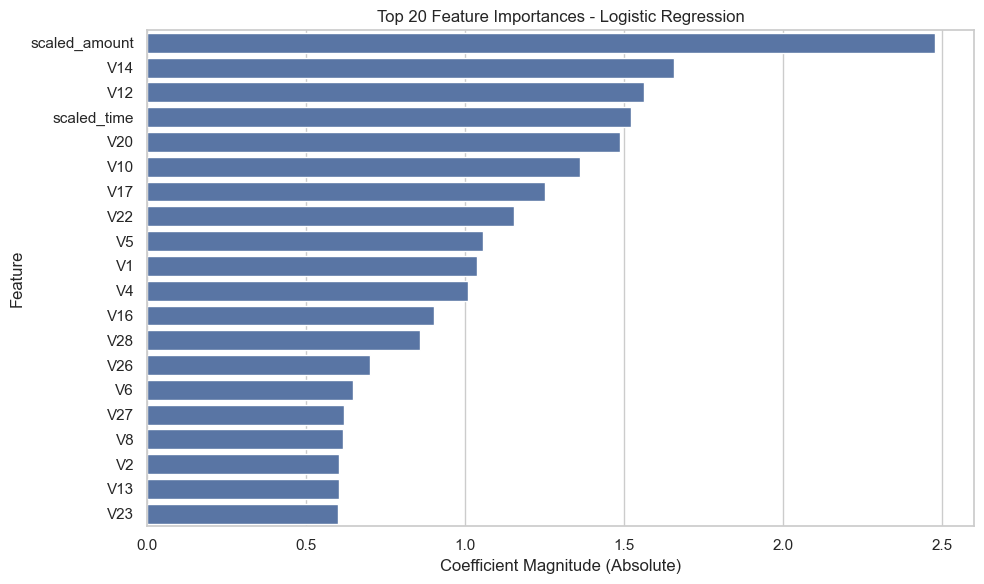

In [22]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=feature_importance.head(20))
plt.title('Top 20 Feature Importances - Logistic Regression')
plt.xlabel('Coefficient Magnitude (Absolute)')
plt.ylabel('Feature')
plt.tight_layout()
plt.show()
